# MEDAL COUNT & HOSTING COUNTRY ANALYSIS (France, USA, Canada and UK)
### DOES HOSTING THE OLYMPIC GAMES IMPROVE PERFORMANCE?

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import plotly.express as px
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from ipywidgets import interact
import seaborn as sns
sns.set_style("whitegrid")

In [27]:
# Load in csv
athelete_df = pd.read_csv("Clean_data.csv")
athelete_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,United Kingdom
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,Belgium


----
## SUMMER OLYMPIC GAMES

In [28]:
athelete_df_summer = athelete_df[(athelete_df['Medal']!='DNW') & (athelete_df['Season']=='Summer')]
athelete_df_summer.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Host_Country
3,4,Edgar Lindenau Aabye,M,34.0,175.0,71.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
37,15,Arvo Ossian Aaltonen,M,30.0,175.0,71.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,Belgium
38,15,Arvo Ossian Aaltonen,M,30.0,175.0,71.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,Belgium


In [29]:
#New dataframe with informations about hosting country 
df_summer = athelete_df_summer.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

df_summer['Is_Host'] = np.where(df_summer['Host_Country'] == df_summer['region'],1,0)
df_summer['Total Medals'] = df_summer['Bronze'] + df_summer['Silver'] + df_summer['Gold']

In [30]:
df_summer.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
0,1896,Greece,Australia,1,2,0,0,3
1,1896,Greece,Austria,2,2,1,0,5
2,1896,Greece,Denmark,3,1,2,0,6
3,1896,Greece,France,2,5,4,0,11
4,1896,Greece,Germany,2,25,5,0,32


##### Medals won by each country (gold, silver and bronze) - Top 20 countries at Summer Olympic Games

In [31]:
#medal count and visualisation of results 

medals = athelete_df_summer.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals['Total'] = medals['Bronze'] + medals['Silver'] + medals['Gold']

medals = medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

medals.iloc[:20].style.set_caption('Medals by Country: Summer Olympic Games [Top 20]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')

#plt.savefig("output_data/Fig1.png")


Medal,Bronze,Silver,Gold,Total
region,,,,
United States of America,1197,1333,2472,5002
Russia,994,974,1220,3188
Germany,1064,987,1075,3126
United Kingdom,620,729,636,1985
France,587,575,465,1627
Italy,454,474,518,1446
Australia,515,456,362,1333
Hungary,363,328,432,1123
Sweden,358,396,354,1108


##### Host countries of Summer Olympic Games and how many times country hosted it

Text(0.5, 1.0, 'Host Countries of Summer Olympic Games and number of times')

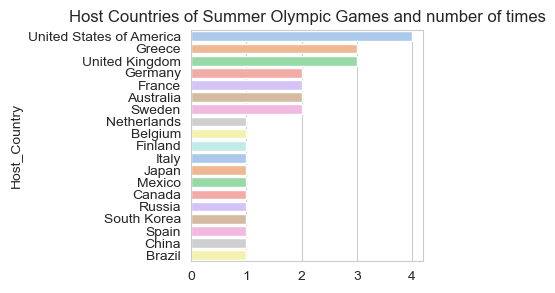

In [32]:
# Visualization for who were Host countires in Summer Olympic Games and how many times they had incredible honor to host them. 

plt.figure(figsize=(3,3))
hosts = df_summer[['Year','Host_Country']].drop_duplicates()
sns.countplot(y='Host_Country',data=hosts,order = hosts['Host_Country'].value_counts().index,
              palette=sns.color_palette("pastel"))
plt.xlabel('')
plt.title('Host Countries of Summer Olympic Games and number of times')

----
## WINTER OLYMPIC GAMES

In [33]:
athelete_df_winter = athelete_df[(athelete_df['Medal']!='DNW') & (athelete_df['Season']=='Winter')]
athelete_df_winter.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Host_Country
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,Russia
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,France
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway,France


In [34]:
#New dataframe with informations about hosting country 
df_winter = athelete_df_winter.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

df_winter['Is_Host'] = np.where(df_winter['Host_Country'] == df_winter['region'],1,0)
df_winter['Total Medals'] = df_winter['Bronze'] + df_winter['Silver'] + df_winter['Gold']

In [35]:
df_winter.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
0,1924,France,Australia,0,1,0,0,1
1,1924,France,Austria,0,3,1,0,4
2,1924,France,Belgium,5,0,0,0,5
3,1924,France,Canada,0,9,0,0,9
4,1924,France,Finland,3,4,8,0,15


##### Medals won by each country (gold, silver and bronze) - Top 20 countries at Winter Olympic Games

In [36]:
#medal count and visualisation of results 

medals = athelete_df_winter.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals['Total'] = medals['Bronze'] + medals['Silver'] + medals['Gold']

medals = medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

medals.iloc[:20].style.set_caption('Medals by Country: Winter Olympic Games [Top 20]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')



Medal,Bronze,Silver,Gold,Total
region,,,,
Russia,184,196,379,759
United States of America,161,308,166,635
Germany,196,208,226,630
Canada,107,199,305,611
Norway,127,165,151,443
Sweden,177,126,125,428
Finland,215,145,66,426
Austria,103,98,79,280
Switzerland,129,70,76,275


##### Host countries of Winter Olympic Games and how many times country hosted it

Text(0.5, 1.0, 'Host Countries of Winter Olympic Games and number of times')

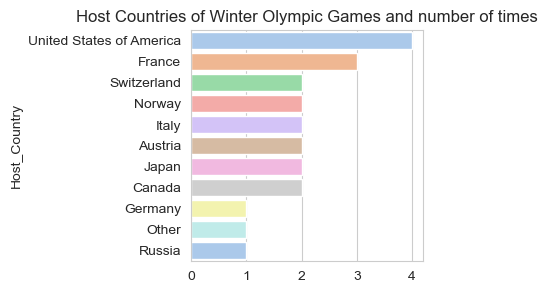

In [37]:
# Visualization for who were Host countires in Winter Olympic Games and how many times they had incredible honor to host them. 

plt.figure(figsize=(3,3))
hosts = df_winter[['Year','Host_Country']].drop_duplicates()
sns.countplot(y='Host_Country',data=hosts,order = hosts['Host_Country'].value_counts().index,
              palette=sns.color_palette("pastel"))
plt.xlabel('')
plt.title('Host Countries of Winter Olympic Games and number of times')

----
## PERFORMANCE OF HOST COUNTRIES AND ANALYSIS (USA, FRANCE, CANADA & UK)


#### 1. USA performance at Olympic games


###### USA hosted 4 winter and 4 summer Olympic games. Summer Olympic Games 2028, will be hosted in Los Angeles USA.

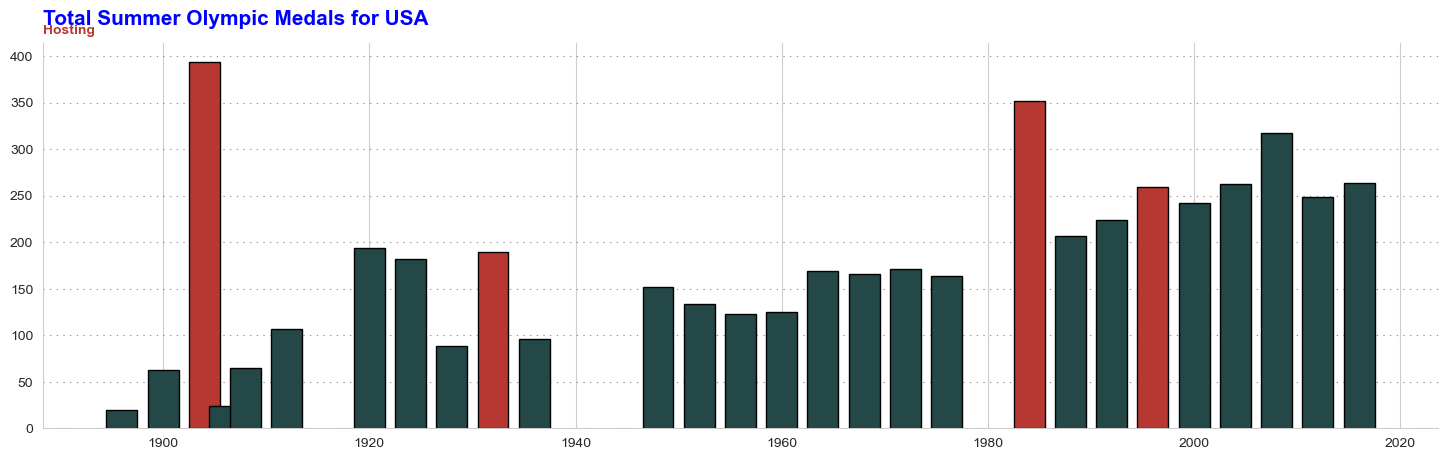

In [38]:
#Visualization how USA performed over years and comparison with performance when USA hosted summer Olympic games.

temp = df_summer.query("region == 'United States of America'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+20, 'Total Summer Olympic Medals for USA', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+10, 'Hosting', fontsize=10,fontweight='bold',color='#B73832')

plt.show()

In [39]:
# performance of USA for Summer Olympic
USA_df_summer = df_summer[df_summer['region'] =='United States of America']
# USA as host for winter
USA_summer_host_df = USA_df_summer[(USA_df_summer['region'] =='United States of America') & (USA_df_summer['Host_Country'] =='United States of America')]
USA_summer_host_df.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
45,1904,United States of America,United States of America,125,128,141,1,394
215,1932,United States of America,United States of America,61,81,47,1,189
669,1984,United States of America,United States of America,50,186,116,1,352
862,1996,United States of America,United States of America,52,159,48,1,259


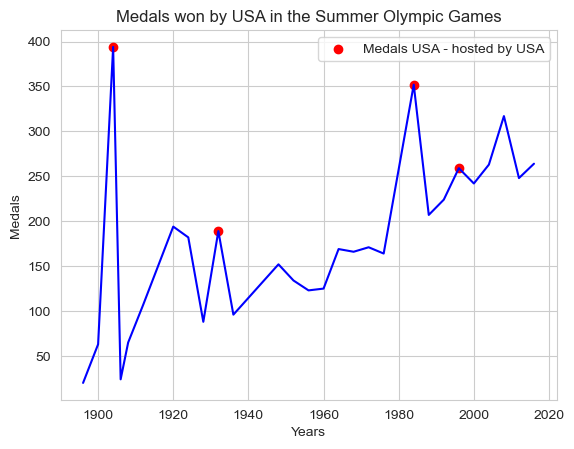

In [40]:
# Plot for Medals by Years for USA in Summer Olympic games
plt.plot(USA_df_summer['Year'], USA_df_summer['Total Medals'], c='blue')
plt.scatter(USA_summer_host_df['Year'], USA_summer_host_df['Total Medals'], c='r', label='Medals USA - hosted by USA')

# Title and Axis
plt.title('Medals won by USA in the Summer Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

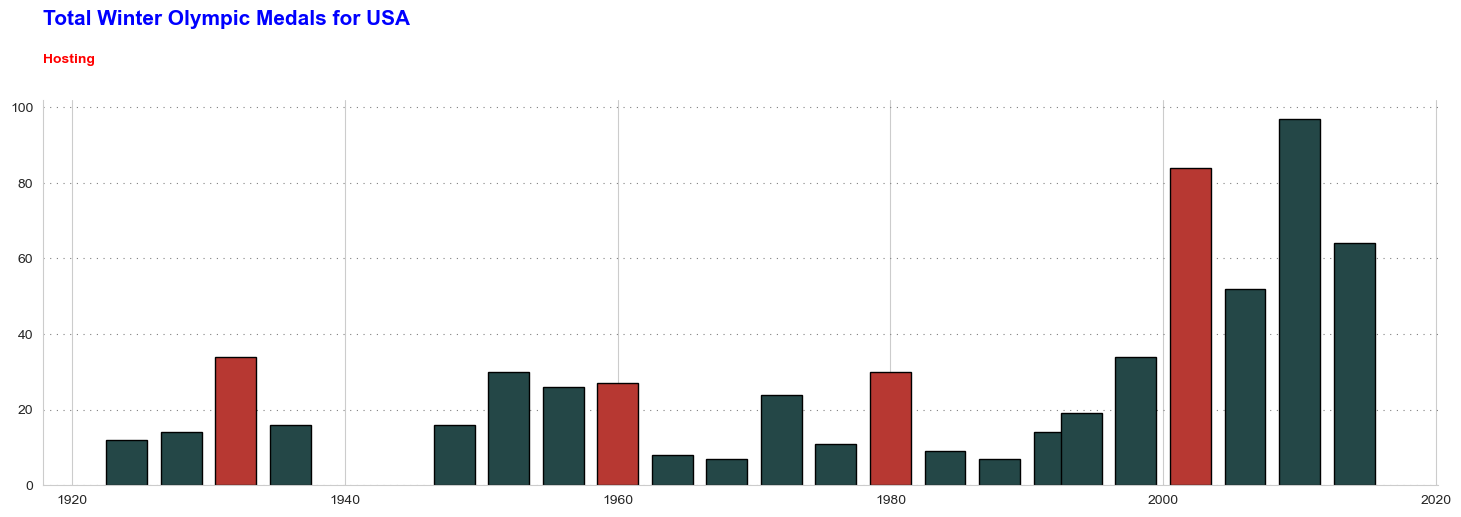

In [41]:
#Visualization how USA performed over years and comparison with performance when USA hosted Winter Olympic games.

temp = df_winter.query("region == 'United States of America'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+20, 'Total Winter Olympic Medals for USA', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+10, 'Hosting', fontsize=10,fontweight='bold',color='red')

plt.show()

In [42]:
# performance of USA for Winter Olympic
USA_df_winter = df_winter[df_winter['region'] =='United States of America']
# USA as host for winter
USA_winter_host_df = USA_df_winter[(USA_df_winter['region'] =='United States of America') & (USA_df_winter['Host_Country'] =='United States of America')]
USA_winter_host_df.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
34,1932,United States of America,United States of America,3,10,21,1,34
98,1960,United States of America,United States of America,4,19,4,1,27
175,1980,United States of America,United States of America,2,24,4,1,30
297,2002,United States of America,United States of America,15,11,58,1,84


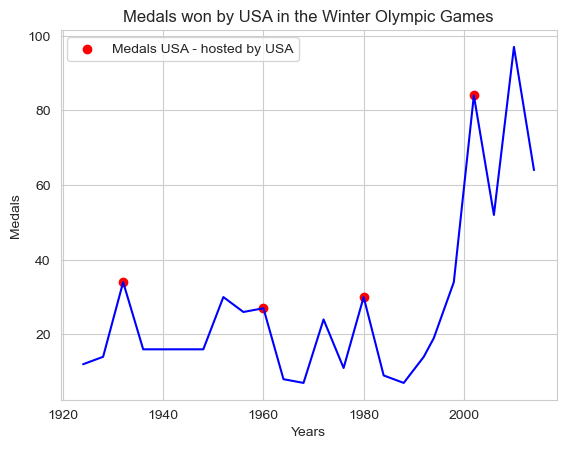

In [43]:
# Plot for Medals by Years by USA in Winter Olympic games
plt.plot(USA_df_winter['Year'], USA_df_winter['Total Medals'], c='blue')
plt.scatter(USA_winter_host_df['Year'], USA_winter_host_df['Total Medals'], c='r', label='Medals USA - hosted by USA')

# Title and Axis
plt.title('Medals won by USA in the Winter Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()


#### 2. France performance at Olympic games


###### France hosted 2 winter and 3 summer Olympic games. This summer, it will be host of 2024 Olympic games!!!

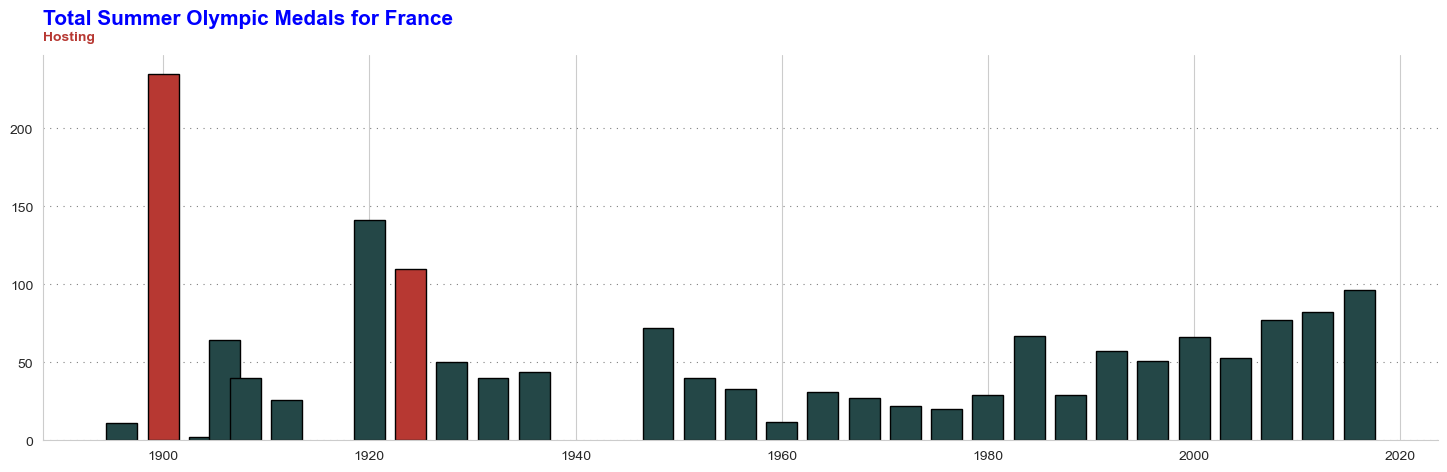

In [44]:
#Visualization how France performed over years and comparison with performance when France hosted summer Olympic games.

temp = df_summer.query("region == 'France'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+20, 'Total Summer Olympic Medals for France', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+10, 'Hosting', fontsize=10,fontweight='bold',color='#B73832')

plt.show()

In [45]:
# performance of France for summer olympic
France_df_summer = df_summer[df_summer['region'] =='France']
France_summer_host_df = France_df_summer[(France_df_summer['region'] =='France') & (France_df_summer['Host_Country'] =='France')]
France_summer_host_df.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
18,1900,France,France,82,52,101,1,235
133,1924,France,France,22,37,51,1,110


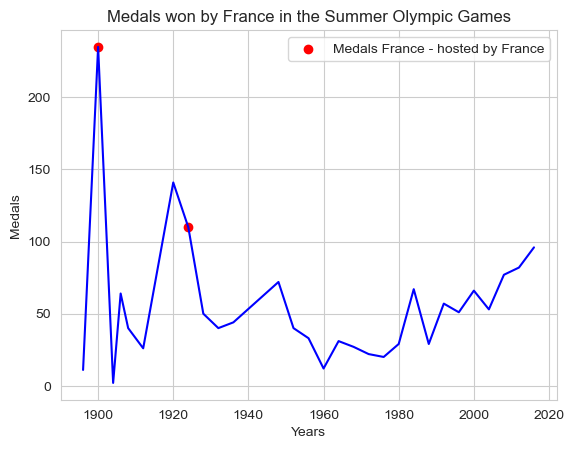

In [46]:
# Plot for Medals by Years
plt.plot(France_df_summer['Year'], France_df_summer['Total Medals'], c='blue')
plt.scatter(France_summer_host_df['Year'], France_summer_host_df['Total Medals'], c='r', label='Medals France - hosted by France')

# Title and Axis
plt.title('Medals won by France in the Summer Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

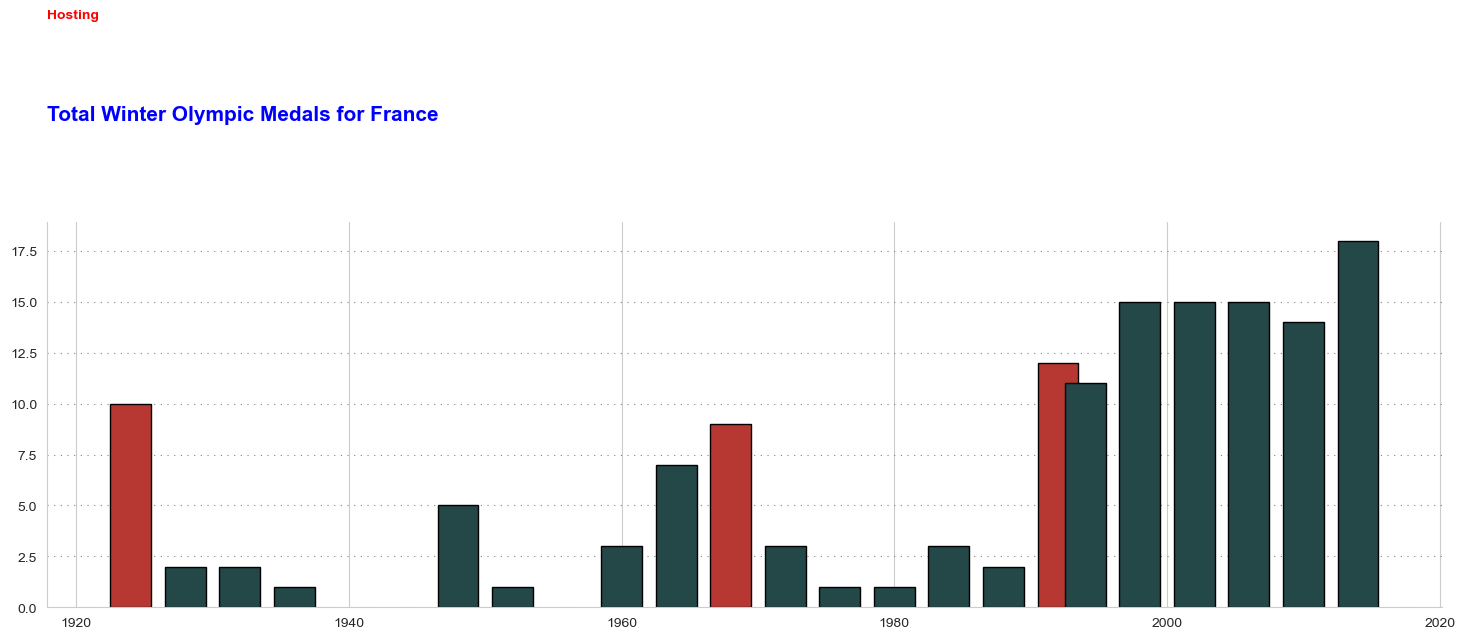

In [47]:
#Visualization how France performed over years and comparison with performance when France hosted winter Olympic games.

temp = df_winter.query("region == 'France'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+5, 'Total Winter Olympic Medals for France', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+10, 'Hosting', fontsize=10,fontweight='bold',color='red')

plt.show()

In [48]:
# performance of France for winter olympic
France_df_winter = df_winter[df_winter['region'] =='France']
# France as host for winter
France_winter_host_df = France_df_winter[(France_df_winter['region'] =='France') & (France_df_winter['Host_Country'] =='France')]
France_winter_host_df.head()


Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
5,1924,France,France,10,0,0,1,10
117,1968,France,France,2,4,3,1,9
213,1992,France,France,1,5,6,1,12


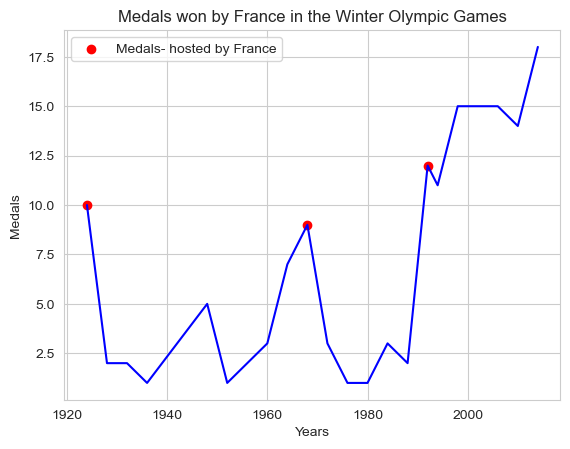

In [49]:
# Plot for Medals by Years for France in winter Olympic games
plt.plot(France_df_winter['Year'], France_df_winter['Total Medals'], c='blue')
plt.scatter(France_winter_host_df['Year'], France_winter_host_df['Total Medals'], c='r', label='Medals- hosted by France')

# Title and Axis
plt.title('Medals won by France in the Winter Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()


#### 3. Canada's performance at Olympic games


###### Canada hosted 2 winter and 1 summer Olympic game.

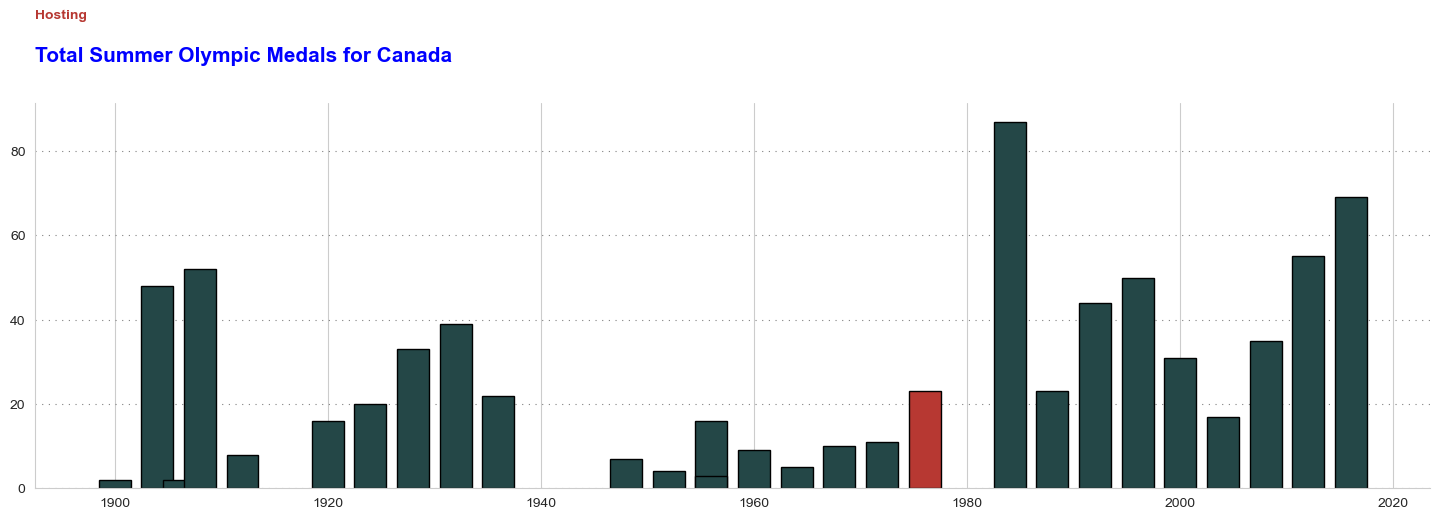

In [50]:
temp = df_summer.query("region == 'Canada'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+10, 'Total Summer Olympic Medals for Canada', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+20, 'Hosting', fontsize=10,fontweight='bold',color='#B73832')

plt.show()

In [51]:
# performance of Canada for Summer Olympic
Canada_df_summer = df_summer[df_summer['region'] =='Canada']
Canada_df_summer_host = Canada_df_summer[(Canada_df_summer['region'] =='Canada') & (Canada_df_summer['Host_Country'] =='Canada')]
Canada_df_summer_host.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
555,1976,Canada,Canada,14,0,9,1,23


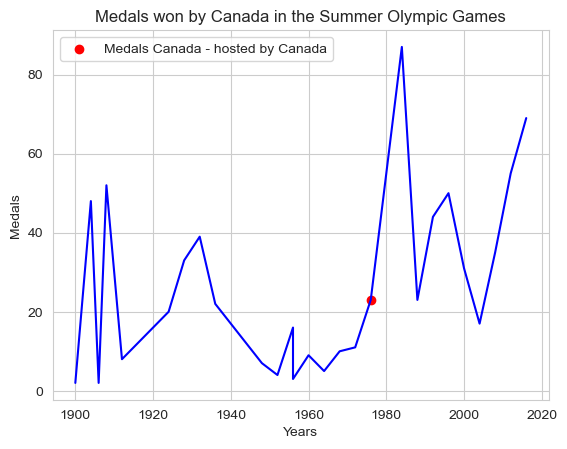

In [52]:
# Plot for Medals by Years 
plt.plot(Canada_df_summer['Year'], Canada_df_summer['Total Medals'], c='blue')
plt.scatter(Canada_df_summer_host['Year'], Canada_df_summer_host['Total Medals'], c='r', label='Medals Canada - hosted by Canada')

# Title and Axis
plt.title('Medals won by Canada in the Summer Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

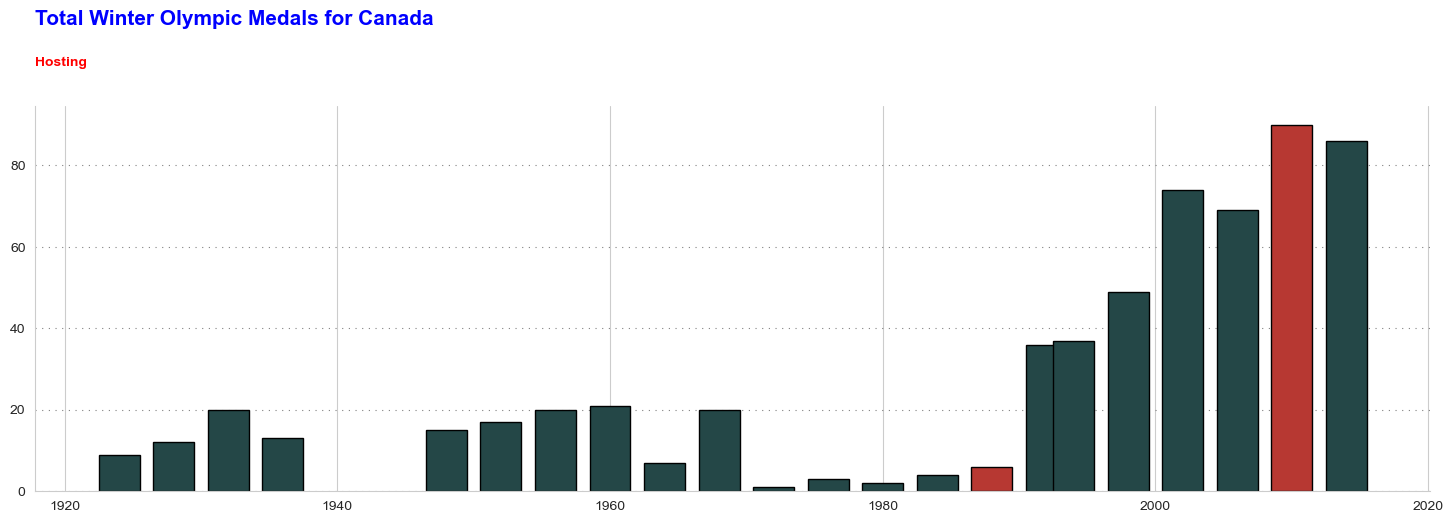

In [53]:
temp = df_winter.query("region == 'Canada'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+20, 'Total Winter Olympic Medals for Canada', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+10, 'Hosting', fontsize=10,fontweight='bold',color='red')

plt.show()

In [54]:
# performance of Canada for Winter Olympic
Canada_df_winter = df_winter[df_winter['region'] =='Canada']
Canada_df_winter_host = Canada_df_winter[(Canada_df_winter['region'] =='Canada') & (Canada_df_winter['Host_Country'] =='Canada')]
Canada_df_winter_host.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
193,1988,Canada,Canada,4,0,2,1,6
327,2010,Canada,Canada,8,67,15,1,90


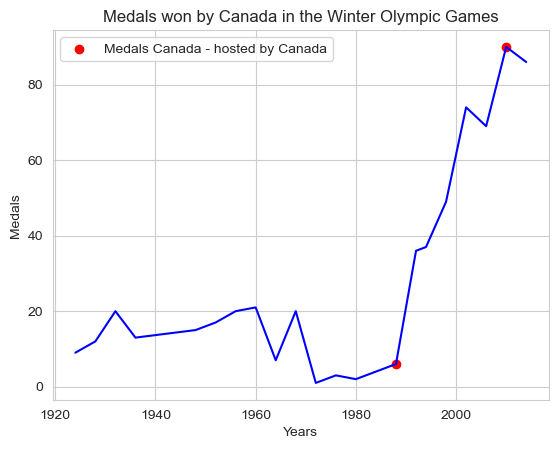

In [55]:
# Plot for Medals by Years 
plt.plot(Canada_df_winter['Year'], Canada_df_winter['Total Medals'], c='blue')
plt.scatter(Canada_df_winter_host['Year'], Canada_df_winter_host['Total Medals'], c='r', label='Medals Canada - hosted by Canada')

# Title and Axis
plt.title('Medals won by Canada in the Winter Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()


#### 4. United Kingdom's performance at Olympic games


###### United Kingdom hosted 3 Summer Olympic game.

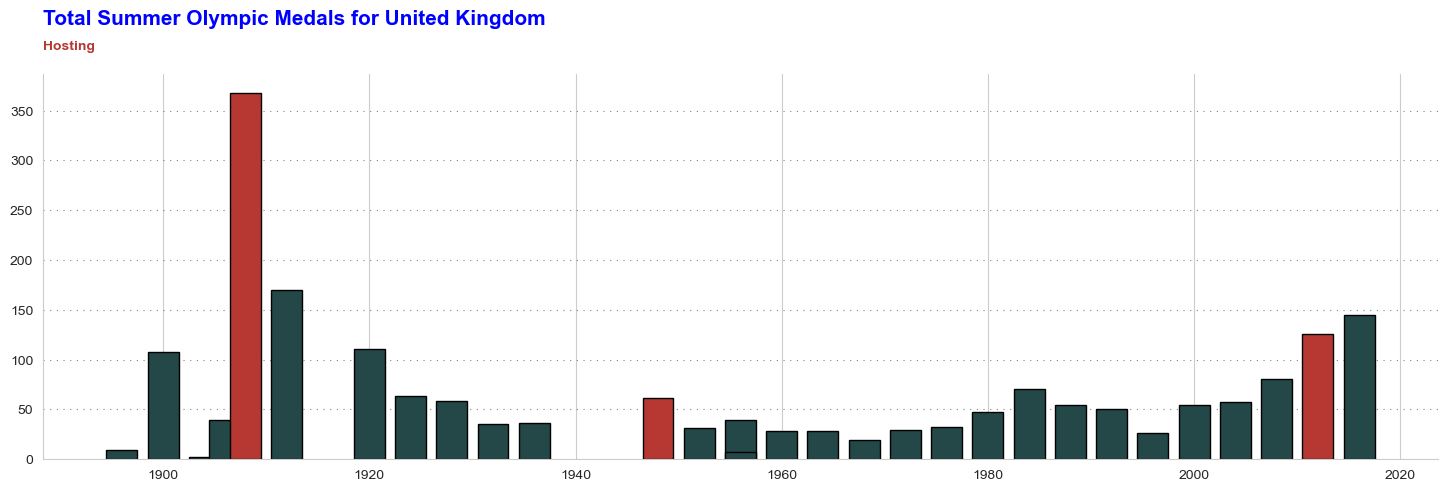

In [56]:
temp = df_summer.query("region == 'United Kingdom'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+50, 'Total Summer Olympic Medals for United Kingdom', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+25, 'Hosting', fontsize=10,fontweight='bold',color='#B73832')

plt.show()

In [57]:
# performance of UK for Summer Olympic
UK_df_summer = df_summer[df_summer['region'] =='United Kingdom']
UK_df_summer_host = UK_df_summer[(UK_df_summer['region'] =='United Kingdom') & (UK_df_summer['Host_Country'] =='United Kingdom')]
UK_df_summer_host.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals
81,1908,United Kingdom,United Kingdom,90,147,131,1,368
284,1948,United Kingdom,United Kingdom,12,7,42,1,61
1184,2012,United Kingdom,United Kingdom,48,48,30,1,126


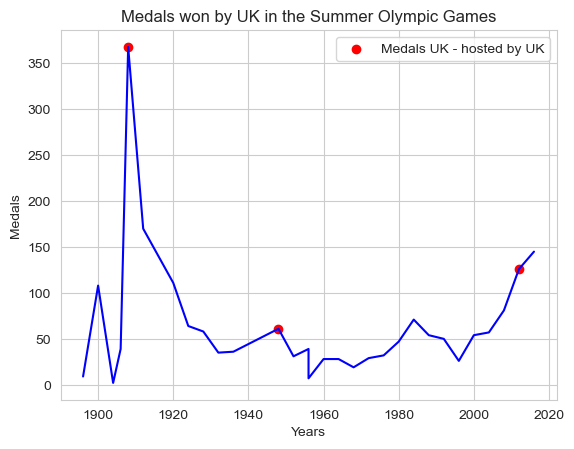

In [58]:
# Plot for Medals by Years 
plt.plot(UK_df_summer['Year'], UK_df_summer['Total Medals'], c='blue')
plt.scatter(UK_df_summer_host['Year'], UK_df_summer_host['Total Medals'], c='r', label='Medals UK - hosted by UK')

# Title and Axis
plt.title('Medals won by UK in the Summer Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

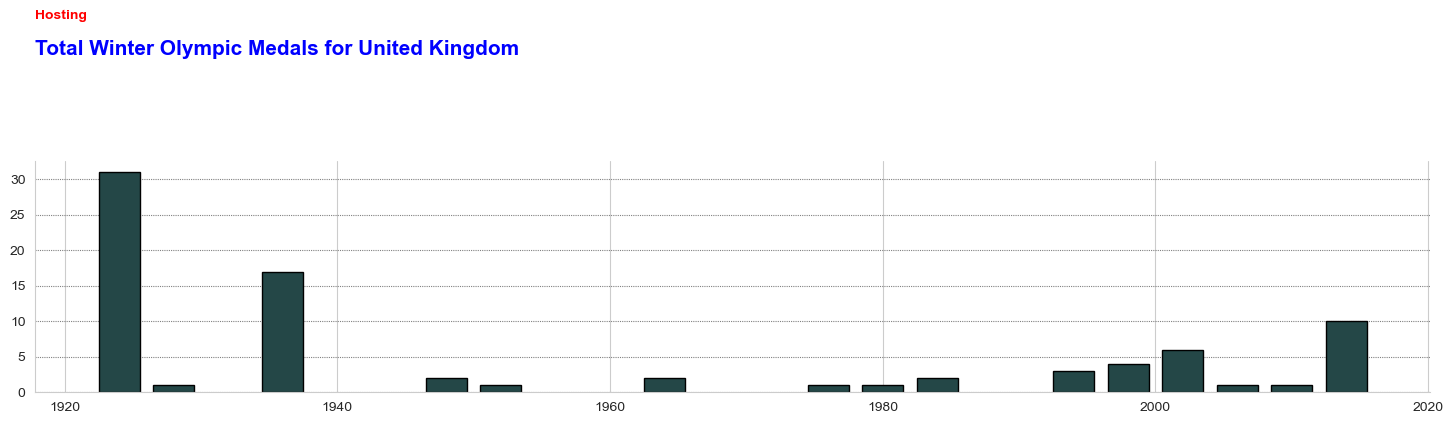

In [59]:
temp = df_winter.query("region == 'United Kingdom'")


fig, ax = plt.subplots(1, 1, figsize=(18, 3), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,1))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+15, 'Total Winter Olympic Medals for United Kingdom', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+20, 'Hosting', fontsize=10,fontweight='bold',color='red')

plt.show()

In [60]:
# performance of UK for Winter Olympic, and it didn't host any winter Olympic game
UK_df_winter = df_winter[df_winter['region'] =='United Kingdom']
UK_df_winter_host = UK_df_winter[(UK_df_winter['region'] =='United Kingdom') & (UK_df_winter['Host_Country'] =='United Kingdom')]
UK_df_winter_host.head()

Medal,Year,Host_Country,region,Bronze,Gold,Silver,Is_Host,Total Medals


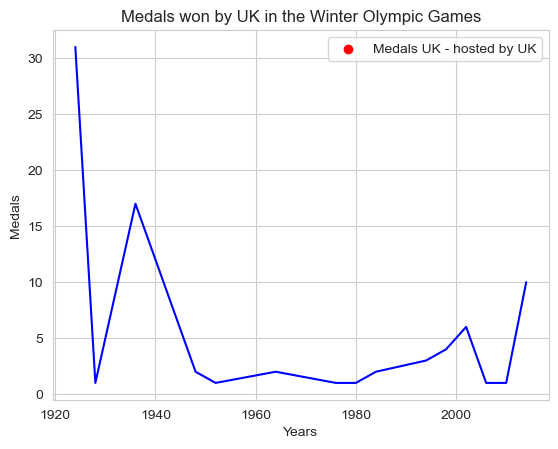

In [61]:
# Plot for Medals by Years 
plt.plot(UK_df_winter['Year'], UK_df_winter['Total Medals'], c='blue')
plt.scatter(UK_df_winter_host['Year'], UK_df_winter_host['Total Medals'], c='r', label='Medals UK - hosted by UK')

# Title and Axis
plt.title('Medals won by UK in the Winter Olympic Games')
plt.xlabel('Years')
plt.ylabel('Medals')
plt.legend()
plt.show()

----
## MEDALS WON BY COUNTRIES AT OLYMPIC GAMES

In [62]:
# Medal Winners for Summer games
athelete_df_summer = athelete_df[(athelete_df['Medal']!='DNW') & (athelete_df['Season']=='Summer')]
athelete_df_summer = athelete_df_summer.groupby(['Host_Country','Year','region'])['Medal'].count().reset_index(name='Medal_Count')
athelete_df_summer = athelete_df_summer.sort_values('Year')
athelete_df_summer.head()

,Host_Country,Year,region,Medal_Count
536,Greece,1896,United Kingdom,9
535,Greece,1896,Switzerland,3
528,Greece,1896,Australia,3
529,Greece,1896,Austria,5
530,Greece,1896,Denmark,6


In [63]:
#Medal Winners for Winter games
athelete_df_winter = athelete_df[(athelete_df['Medal']!='DNW') & (athelete_df['Season']=='Winter')]
athelete_df_winter = athelete_df_winter.groupby(['Host_Country','Year','region'])['Medal'].count().reset_index(name='Medal_Count')
athelete_df_winter = athelete_df_winter.sort_values('Year')
athelete_df_winter

,Host_Country,Year,region,Medal_Count
72,France,1924,Austria,4
73,France,1924,Belgium,5
71,France,1924,Australia,1
79,France,1924,Norway,17
80,France,1924,Sweden,9
...,...,...,...,...
283,Russia,2014,United Kingdom,10
282,Russia,2014,Ukraine,5
281,Russia,2014,Switzerland,30
271,Russia,2014,Kazakhstan,1


In [64]:
host_country_df = athelete_df.groupby(['Host_Country','Year','region'])['Medal'].count().reset_index(name='Medal_Count')
host_country_df.head(5)

,Host_Country,Year,region,Medal_Count
0,Australia,1956,Afghanistan,12
1,Australia,1956,Argentina,31
2,Australia,1956,Australia,405
3,Australia,1956,Austria,49
4,Australia,1956,Bahamas,5


In [65]:
host_country_medals_df = host_country_df[host_country_df['Host_Country']==host_country_df['region']]
host_country_df_sorted = host_country_df.sort_values(by='Medal_Count', ascending=False)
host_country_medals_df_sorted = host_country_medals_df.sort_values(by='Medal_Count', ascending=False)

In [66]:
host_country_medals_df_sorted.head(5)

,Host_Country,Year,region,Medal_Count
3244,United States of America,1904,United States of America,1109
1080,France,1900,France,1071
1334,Germany,1972,Germany,1041
2966,United Kingdom,1908,United Kingdom,972
3682,United States of America,1996,United States of America,839


In [67]:
host_country_medals_df.head(5)

,Host_Country,Year,region,Medal_Count
2,Australia,1956,Australia,405
75,Australia,2000,Australia,788
267,Austria,1964,Austria,116
304,Austria,1976,Austria,116
339,Belgium,1920,Belgium,518


In [68]:
hosting_countries_df=pd.merge(host_country_df,host_country_medals_df, on=['region'], how='inner')
hosting_countries_df_sorted=hosting_countries_df.sort_values(by='Medal_Count_x', ascending=False)
hosting_countries_df_sorted.head(5)

,Host_Country_x,Year_x,region,Medal_Count_x,Host_Country_y,Year_y,Medal_Count_y
1940,United States of America,1904,United States of America,1109,United States of America,1932,813
1939,United States of America,1904,United States of America,1109,United States of America,1904,1109
1941,United States of America,1904,United States of America,1109,United States of America,1960,105
1942,United States of America,1904,United States of America,1109,United States of America,1980,155
1943,United States of America,1904,United States of America,1109,United States of America,1984,693


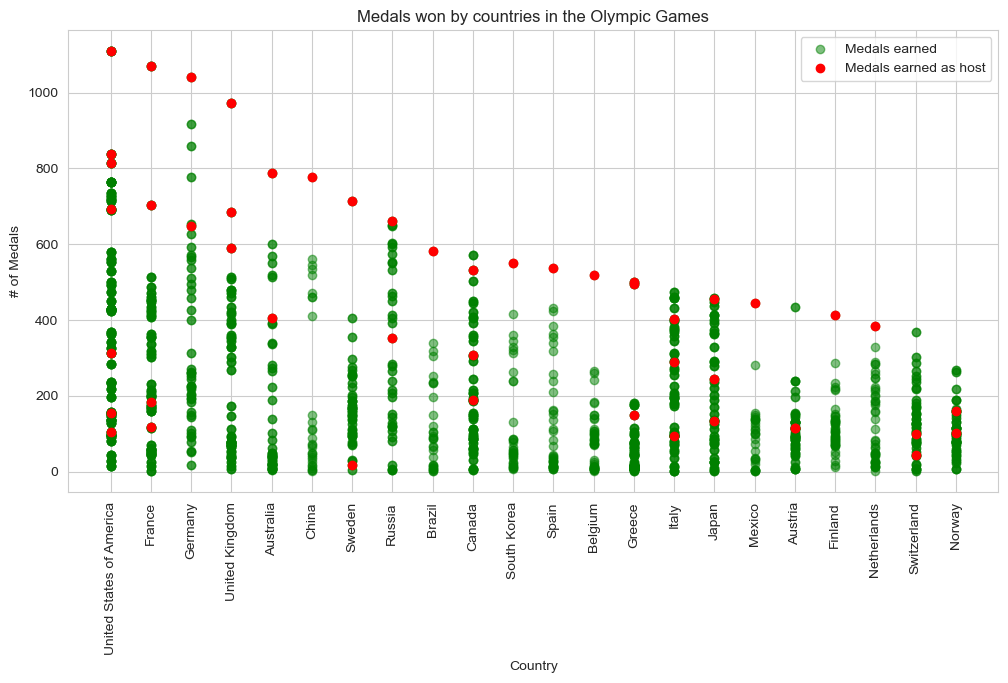

In [69]:
plt.figure(figsize=(12, 6))
plt.scatter(hosting_countries_df_sorted['region'], hosting_countries_df_sorted['Medal_Count_x'], c='g',alpha=0.5, label='Medals earned')
plt.scatter(host_country_medals_df_sorted['region'], host_country_medals_df_sorted['Medal_Count'], c='r',alpha=1.0, label='Medals earned as host')
plt.title('Medals won by countries in the Olympic Games')
plt.xlabel('Country')
plt.ylabel('# of Medals')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

----
## COUNTRIES THAT WON GOLD MEDALS AND MAP VISUALIZATION

In [70]:
df = athelete_df[athelete_df['Medal']=='Gold']
df2 = df.groupby(['region'])['Medal'].count().reset_index(name='Gold Count')
df2.head()

,region,Gold Count
0,Algeria,5
1,Argentina,91
2,Armenia,2
3,Australia,368
4,Austria,108


In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data = world.merge(df2, how='right', left_on='name', right_on='region')

fig = px.choropleth(world_data, 
                     locations='iso_a3', 
                     color='Gold Count',
                     hover_name='region', 
                     projection='natural earth',
                     color_continuous_scale='Viridis')

# Update hover information
fig.update_traces(hoverinfo='all', 
                  hovertemplate='Country: %{hovertext}<br>Data: %{customdata[0]}',
                  customdata=world_data[['Gold Count']])

# Show the plot
fig.update_layout(height=800, width=1000)
fig.show()

C:\Users\soumy\AppData\Local\Temp\ipykernel_40884\3990371491.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

